In [1]:
import os 
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
labels = ['Neutral','Disgust','Fear','Sadness', 'Anger', 'Happiness', 'Surprise']

In [3]:
labels_dct={'Neutral': 0,
             'Disgust': 1,
             'Fear': 2,
             'Sadness': 3,
             'Anger': 4,
             'Happiness': 5,
             'Surprise': 6}

In [19]:
img_size=224

# Paths

In [4]:
root_path=os.path.join('FER','workspace')

train_path=os.path.join(root_path,'train')
train_aug_path=os.path.join(root_path,'train-aug')
test_path=os.path.join(root_path,'test')
validate_path=os.path.join(root_path,'validate')

model_path=train=os.path.join(root_path,'model')

In [4]:
img_array=cv2.imread(os.path.join(train_path,"Anger-11-20-Abhishek.19e6ae41-934a-11ee-a08e-c717adbc9268100.jpg"))
type(img_array)

numpy.ndarray

In [5]:
img_array.shape

(219, 219, 3)

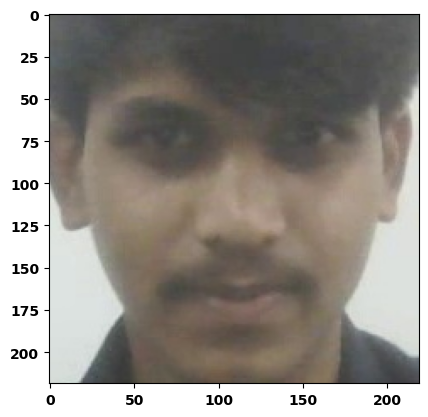

In [10]:
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
plt.show()

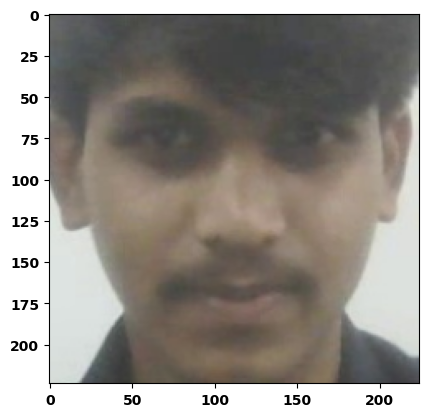

(224, 224, 3)

In [17]:
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

new_array.shape

# Creating Training data list

In [18]:
training_arr=[]

for img_nm in os.listdir(train_path):
    label_nm = img_nm.split('-')[0]
    if label_nm in labels_dct:
        class_num = labels_dct[label_nm]
        img_array=cv2.imread(os.path.join(train_path,img_nm))
        new_array=cv2.resize(img_array,(img_size,img_size))
        training_arr.append([new_array,class_num])
    else:
        print("error in",img_nm)
    

In [20]:
len(training_arr)

21490

In [21]:
import random

random.shuffle(training_arr)

In [22]:
X,Y=[],[]

for feature,label in training_arr:
    X.append(feature)
    Y.append(label)
    
df_dct = {'Feature':X, 'label':Y}

# Creating test data list

In [ ]:
test_arr=[]

for img_nm in os.listdir(test_path):
    label_nm = img_nm.split('-')[0]
    if label_nm in labels_dct:
        class_num = labels_dct[label_nm]
        img_array=cv2.imread(os.path.join(train_path,img_nm))
        new_array=cv2.resize(img_array,(img_size,img_size))
        test_arr.append([new_array,class_num])
    else:
        print("error in",img_nm)
    

In [ ]:
len(test_arr)

In [ ]:
import random

random.shuffle(test_arr)

In [ ]:
X_test,Y_test=[],[]

for feature,label in training_arr:
    X_test.append(feature)
    Y_test.append(label)
    
X_test=X_test/255.0

# Dataframe 

In [23]:
import pandas as pd

df = pd.DataFrame(df_dct)
df

,Feature,label
0,"[[[252, 253, 251], [252, 253, 251], [250, 253,...",2
1,"[[[143, 146, 144], [138, 141, 139], [133, 133,...",0
2,"[[[224, 227, 225], [231, 234, 232], [225, 228,...",4
3,"[[[220, 231, 228], [219, 230, 227], [219, 230,...",6
4,"[[[151, 160, 157], [150, 159, 156], [154, 161,...",1
...,...,...
21485,"[[[178, 183, 181], [175, 180, 178], [178, 183,...",0
21486,"[[[211, 219, 218], [211, 219, 218], [211, 219,...",5
21487,"[[[97, 100, 98], [96, 99, 97], [94, 98, 93], [...",4
21488,"[[[172, 173, 171], [172, 173, 171], [171, 173,...",5


In [24]:
X=np.array(X).reshape(-1,img_size,img_size,3)
Y=np.array(Y)
X.shape,Y.shape

((21490, 224, 224, 3), (21490,))

# Normalize

In [25]:
X = X/255.0

In [26]:
X[0][0]

array([[0.98823529, 0.99215686, 0.98431373],
       [0.98823529, 0.99215686, 0.98431373],
       [0.98039216, 0.99215686, 0.98431373],
       [0.97647059, 0.99215686, 0.98431373],
       [0.97254902, 0.99215686, 0.98431373],
       [0.97254902, 0.99215686, 0.98431373],
       [0.97647059, 0.99607843, 0.98823529],
       [0.97647059, 0.99607843, 0.98823529],
       [0.98039216, 0.99607843, 0.99215686],
       [0.97647059, 0.98823529, 0.98039216],
       [0.98039216, 0.99215686, 0.98431373],
       [0.99215686, 0.99607843, 0.98823529],
       [0.95294118, 0.95686275, 0.94901961],
       [0.96862745, 0.96078431, 0.95686275],
       [0.9372549 , 0.92941176, 0.9254902 ],
       [0.86666667, 0.84705882, 0.83529412],
       [0.4627451 , 0.44313725, 0.43137255],
       [0.24705882, 0.22745098, 0.21568627],
       [0.2745098 , 0.25098039, 0.23921569],
       [0.2745098 , 0.24705882, 0.23529412],
       [0.27843137, 0.25098039, 0.23921569],
       [0.25882353, 0.23137255, 0.21960784],
       [0.

In [27]:
Y[0]

2

# Model Creation and Training 

In [5]:
import tensorflow as tf
from tensorflow.keras import layers

In [6]:
import h5py

In [7]:
model = tf.keras.applications.resnet_v2.ResNet152V2()

In [8]:
model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                        

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block5_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block5_2_pad (ZeroPaddin  (None, 30, 30, 128)  0          ['conv3_block5_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv3_blo

                                                                  'conv3_block7_3_conv[0][0]']    
                                                                                                  
 conv3_block8_preact_bn (BatchN  (None, 28, 28, 512)  2048       ['conv3_block7_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv3_block8_preact_relu (Acti  (None, 28, 28, 512)  0          ['conv3_block8_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv3_block8_1_conv (Conv2D)   (None, 28, 28, 128)  65536       ['conv3_block8_preact_relu[0][0]'
                                                                 ]                                
          

 n)                                                                                               
                                                                                                  
 conv4_block2_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block2_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  589824      ['conv4_block2_2_pad[0][0]']     
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block5_preact_bn (BatchN  (None, 14, 14, 1024  4096       ['conv4_block4_out[0][0]']       
 ormalization)                  )                                                                 
                                                                                                  
 conv4_block5_preact_relu (Acti  (None, 14, 14, 1024  0          ['conv4_block5_preact_bn[0][0]'] 
 vation)                        )                                                                 
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262144      ['conv4_block5_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block7_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block7_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block7_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block7_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_blo

 conv4_block10_1_conv (Conv2D)  (None, 14, 14, 256)  262144      ['conv4_block10_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block10_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block10_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block10_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block10_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block10_2_pad (ZeroPaddi  (None, 16, 16, 256)  0          ['conv4_block10_1_relu[0][0]']   
 ng2D)    

                                                                                                  
 conv4_block12_3_conv (Conv2D)  (None, 14, 14, 1024  263168      ['conv4_block12_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block12_out (Add)        (None, 14, 14, 1024  0           ['conv4_block11_out[0][0]',      
                                )                                 'conv4_block12_3_conv[0][0]']   
                                                                                                  
 conv4_block13_preact_bn (Batch  (None, 14, 14, 1024  4096       ['conv4_block12_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_blo

 conv4_block15_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block15_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block15_2_pad (ZeroPaddi  (None, 16, 16, 256)  0          ['conv4_block15_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block15_2_conv (Conv2D)  (None, 14, 14, 256)  589824      ['conv4_block15_2_pad[0][0]']    
                                                                                                  
 conv4_block15_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block15_2_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block18_preact_bn (Batch  (None, 14, 14, 1024  4096       ['conv4_block17_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block18_preact_relu (Act  (None, 14, 14, 1024  0          ['conv4_block18_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block18_1_conv (Conv2D)  (None, 14, 14, 256)  262144      ['conv4_block18_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_blo

 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 256)  589824      ['conv4_block20_2_pad[0][0]']    
                                                                                                  
 conv4_block20_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block20_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block20_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_3_conv (Conv2D)  (None, 14, 14, 1024  263168      ['conv4_block20_2_relu[0][0]']   
                                )                                                                 
          

                                                                                                  
 conv4_block23_1_conv (Conv2D)  (None, 14, 14, 256)  262144      ['conv4_block23_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block23_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block23_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block23_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 on)                                                                                              
                                                                                                  
 conv4_block25_3_conv (Conv2D)  (None, 14, 14, 1024  263168      ['conv4_block25_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block25_out (Add)        (None, 14, 14, 1024  0           ['conv4_block24_out[0][0]',      
                                )                                 'conv4_block25_3_conv[0][0]']   
                                                                                                  
 conv4_block26_preact_bn (Batch  (None, 14, 14, 1024  4096       ['conv4_block25_out[0][0]']      
 Normalization)                 )                                                                 
          

                                                                                                  
 conv4_block28_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block28_2_pad (ZeroPaddi  (None, 16, 16, 256)  0          ['conv4_block28_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block28_2_conv (Conv2D)  (None, 14, 14, 256)  589824      ['conv4_block28_2_pad[0][0]']    
                                                                                                  
 conv4_block28_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block28_2_conv[0][0]']   
 lization)

                                )                                 'conv4_block30_3_conv[0][0]']   
                                                                                                  
 conv4_block31_preact_bn (Batch  (None, 14, 14, 1024  4096       ['conv4_block30_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block31_preact_relu (Act  (None, 14, 14, 1024  0          ['conv4_block31_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block31_1_conv (Conv2D)  (None, 14, 14, 256)  262144      ['conv4_block31_preact_relu[0][0]
                                                                 ']                               
          

                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 14, 14, 256)  589824      ['conv4_block33_2_pad[0][0]']    
                                                                                                  
 conv4_block33_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block33_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block33_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_3_conv (Conv2D)  (None, 14, 14, 1024  263168      ['conv4_block33_2_relu[0][0]']   
          

 ivation)                       )                                                                 
                                                                                                  
 conv4_block36_1_conv (Conv2D)  (None, 14, 14, 256)  262144      ['conv4_block36_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block36_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block36_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block36_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block36_1_bn[0][0]']     
 on)                                                                                              
          

 conv5_block2_2_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
          

In [36]:
base_input=model.layers[0].input
base_output=model.layers[-2].output

In [ ]:
final_output=layers.Dense(1024)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(512)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(256)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(128)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,'softmax')(final_output)

In [ ]:
from tensorflow import keras

new_model =keras.Model(inputs=base_input, outputs=final_output) 

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',metrics=['accuracy'])

In [ ]:
new_model.fit(X,Y,epochs=25,batch_size=5)

In [32]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [33]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [34]:
tf.compat.v1.disable_eager_execution()